In [1]:
# Import Base libs for read and show data
import pandas as pd
import matplotlib.pyplot as plt
import pathlib as path
from utils import Wiki_Scrapter, extract_entity_id
from datasets import load_dataset


/home/andrea/miniconda3/envs/MNLP/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# const values
BASE_DIR = path.PosixPath('train.csv')

In [3]:
# Load dataset from CSV file
dataset_t = load_dataset('sapienzanlp/nlp2025_hw1_cultural_dataset',)['train'].to_pandas()
dataset_v = load_dataset('sapienzanlp/nlp2025_hw1_cultural_dataset')['validation'].to_pandas()

In [4]:
# Visualize some dataset entry
dataset_t.head(n=10)

,item,name,description,type,category,subcategory,label
0,http://www.wikidata.org/entity/Q32786,916,2012 film by M. Mohanan,entity,films,film,cultural exclusive
1,http://www.wikidata.org/entity/Q371,!!!,American dance-punk band from California,entity,music,musical group,cultural representative
2,http://www.wikidata.org/entity/Q3729947,¡Soborno!,Mort & Phil comic,entity,comics and anime,comics,cultural representative
3,http://www.wikidata.org/entity/Q158611,+44,American band,entity,music,musical group,cultural representative
4,http://www.wikidata.org/entity/Q280375,1 Monk Street,"building in Monmouth, Wales",entity,architecture,building,cultural exclusive
5,http://www.wikidata.org/entity/Q104414508,100 percent corner,term for city center,concept,geography,city,cultural agnostic
6,http://www.wikidata.org/entity/Q3008535,1889 Apia cyclone,Category 1 South Pacific cyclone in 1889,entity,history,historical event,cultural agnostic
7,http://www.wikidata.org/entity/Q85720601,18th Abduction,novel by James patterson,entity,books,book,cultural agnostic
8,http://www.wikidata.org/entity/Q105570,20 July plot,"attempt to assassinate Adolf Hitler, 1944",entity,history,historical event,cultural exclusive
9,http://www.wikidata.org/entity/Q434841,20th Century Studios,American film studio owned by The Walt Disney ...,entity,media,film studio,cultural representative


In [5]:
# Plot values distribution to observer particular carachteristics
# test dataset
category_dist_t = pd.Series.value_counts((dataset_t['category']))
type_dist_t = pd.Series.value_counts((dataset_t['type']))
sub_dist_t = pd.Series.value_counts((dataset_t['subcategory']))
label_dist_t = pd.Series.value_counts((dataset_t['label']))
# validation dataset
category_dist_v = pd.Series.value_counts((dataset_v['category']))
type_dist_v = pd.Series.value_counts((dataset_v['type']))
sub_dist_v = pd.Series.value_counts((dataset_v['subcategory']))
label_dist_v = pd.Series.value_counts((dataset_v['label']))

print(label_dist_t)

# Gaussian distribution
print(sub_dist_t)

# unbalanced    
print(type_dist_t)

# category
print(category_dist_t)


label
cultural exclusive         2691
cultural agnostic          1872
cultural representative    1688
Name: count, dtype: int64
subcategory
politician           99
film                 95
law                  95
sport                95
ritual               94
                     ..
environment           5
cooking technique     4
fashion trend         4
writing style         4
body language         1
Name: count, Length: 108, dtype: int64
type
entity     3924
concept    2327
Name: count, dtype: int64
category
politics                   532
sports                     429
geography                  411
architecture               396
philosophy and religion    395
literature                 363
music                      348
food                       346
fashion                    319
visual arts                313
comics and anime           312
history                    304
biology                    286
media                      285
performing arts            275
films               

## Category Analysis

Look up to exploit some information on category, analyzing statistical aspects such as data distribution

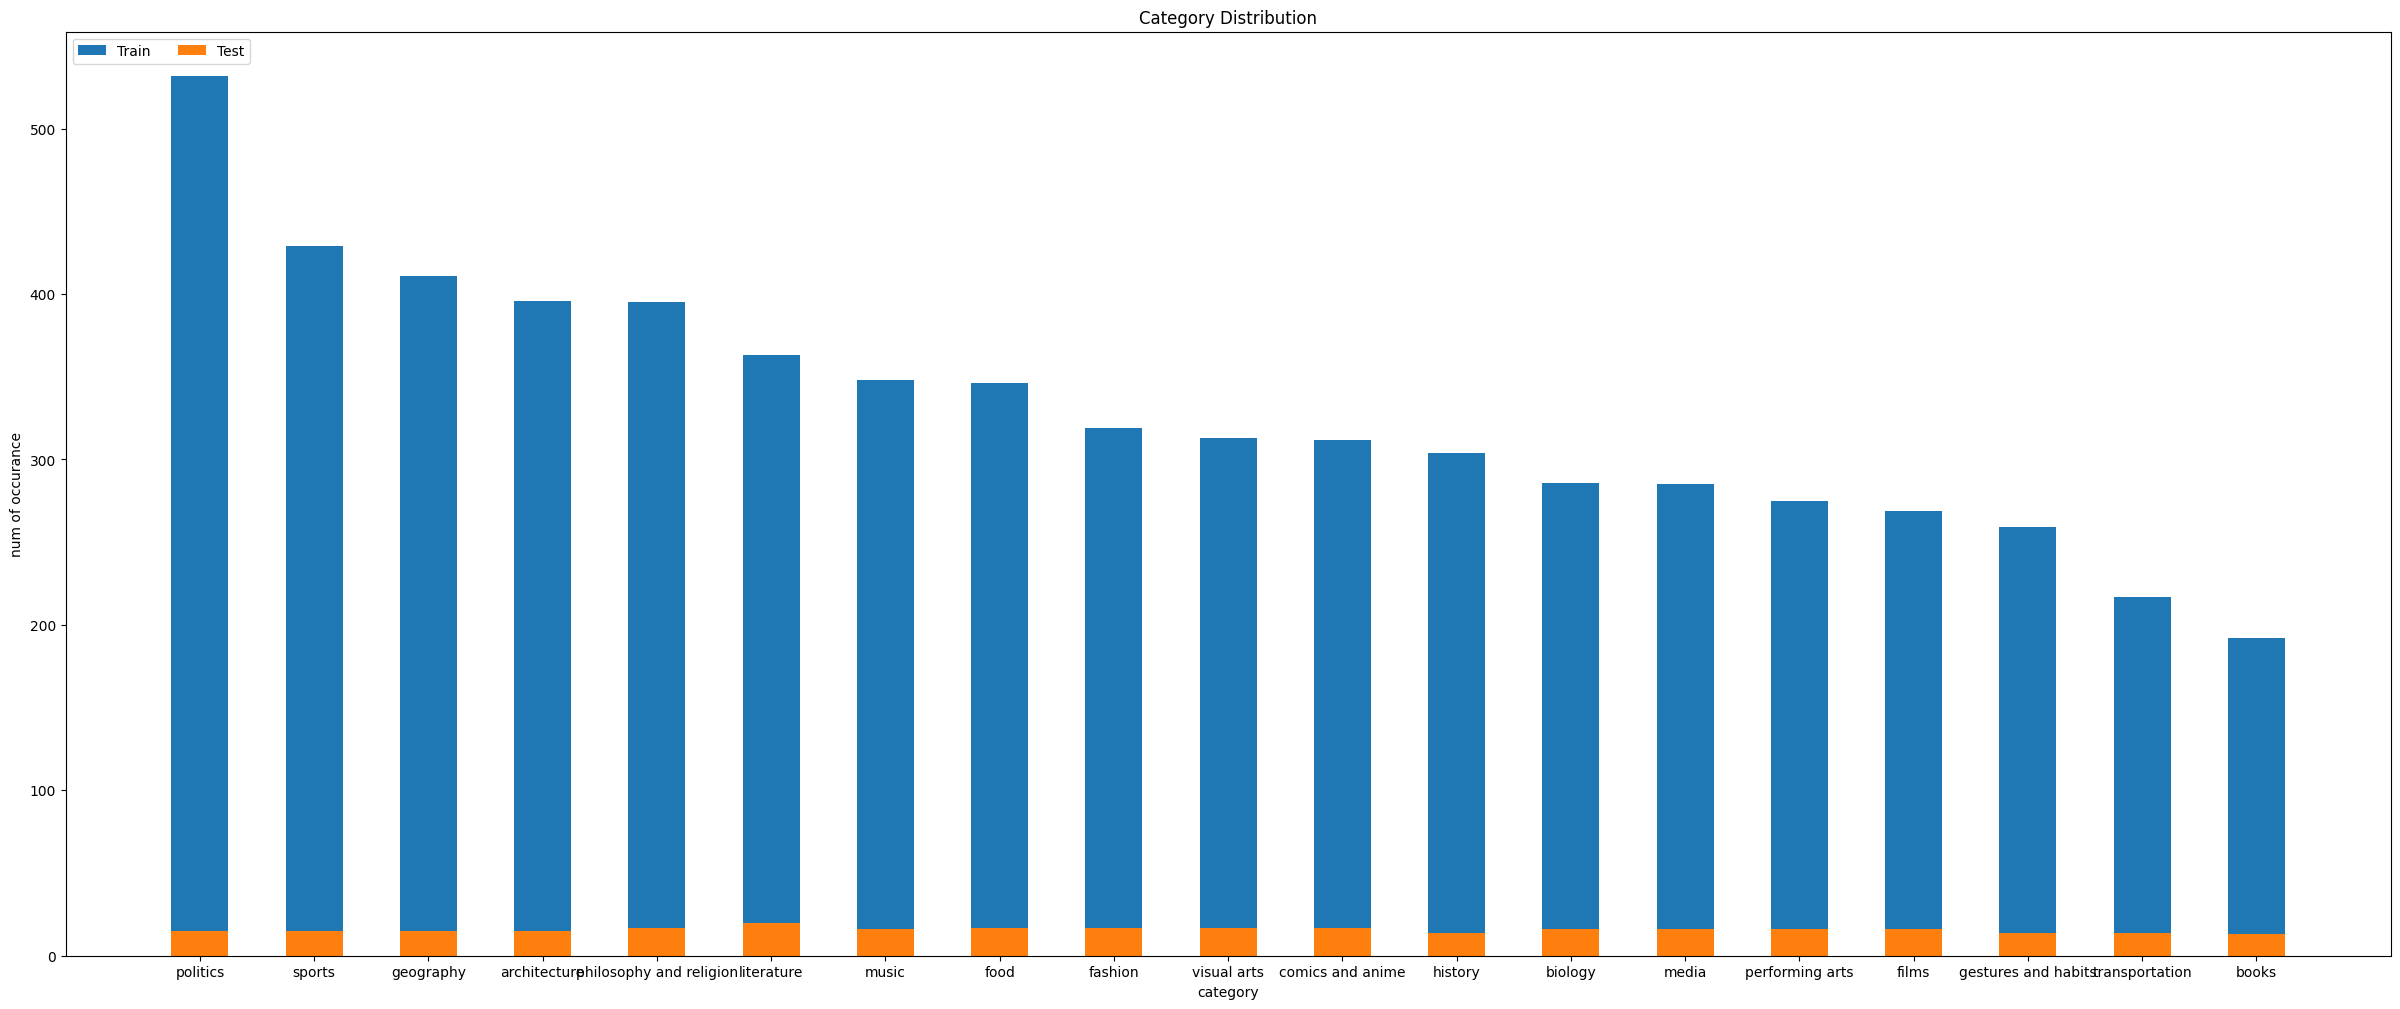

In [6]:
# Plots category distribution
plt.figure(figsize=(30,12))
plt.title('Category Distribution')
plt.xlabel('category')
plt.ylabel('num of occurance')
plt.bar(category_dist_t.index, category_dist_t, 0.5, label='Train')

plt.bar(category_dist_v.index, category_dist_v, 0.5, label='Test')
plt.legend(loc='upper left', ncols=2)

## Subcategory Analysis

Look up to exploit some information on category analyzing statistical aspects, such as data distribution and visual rappresentation

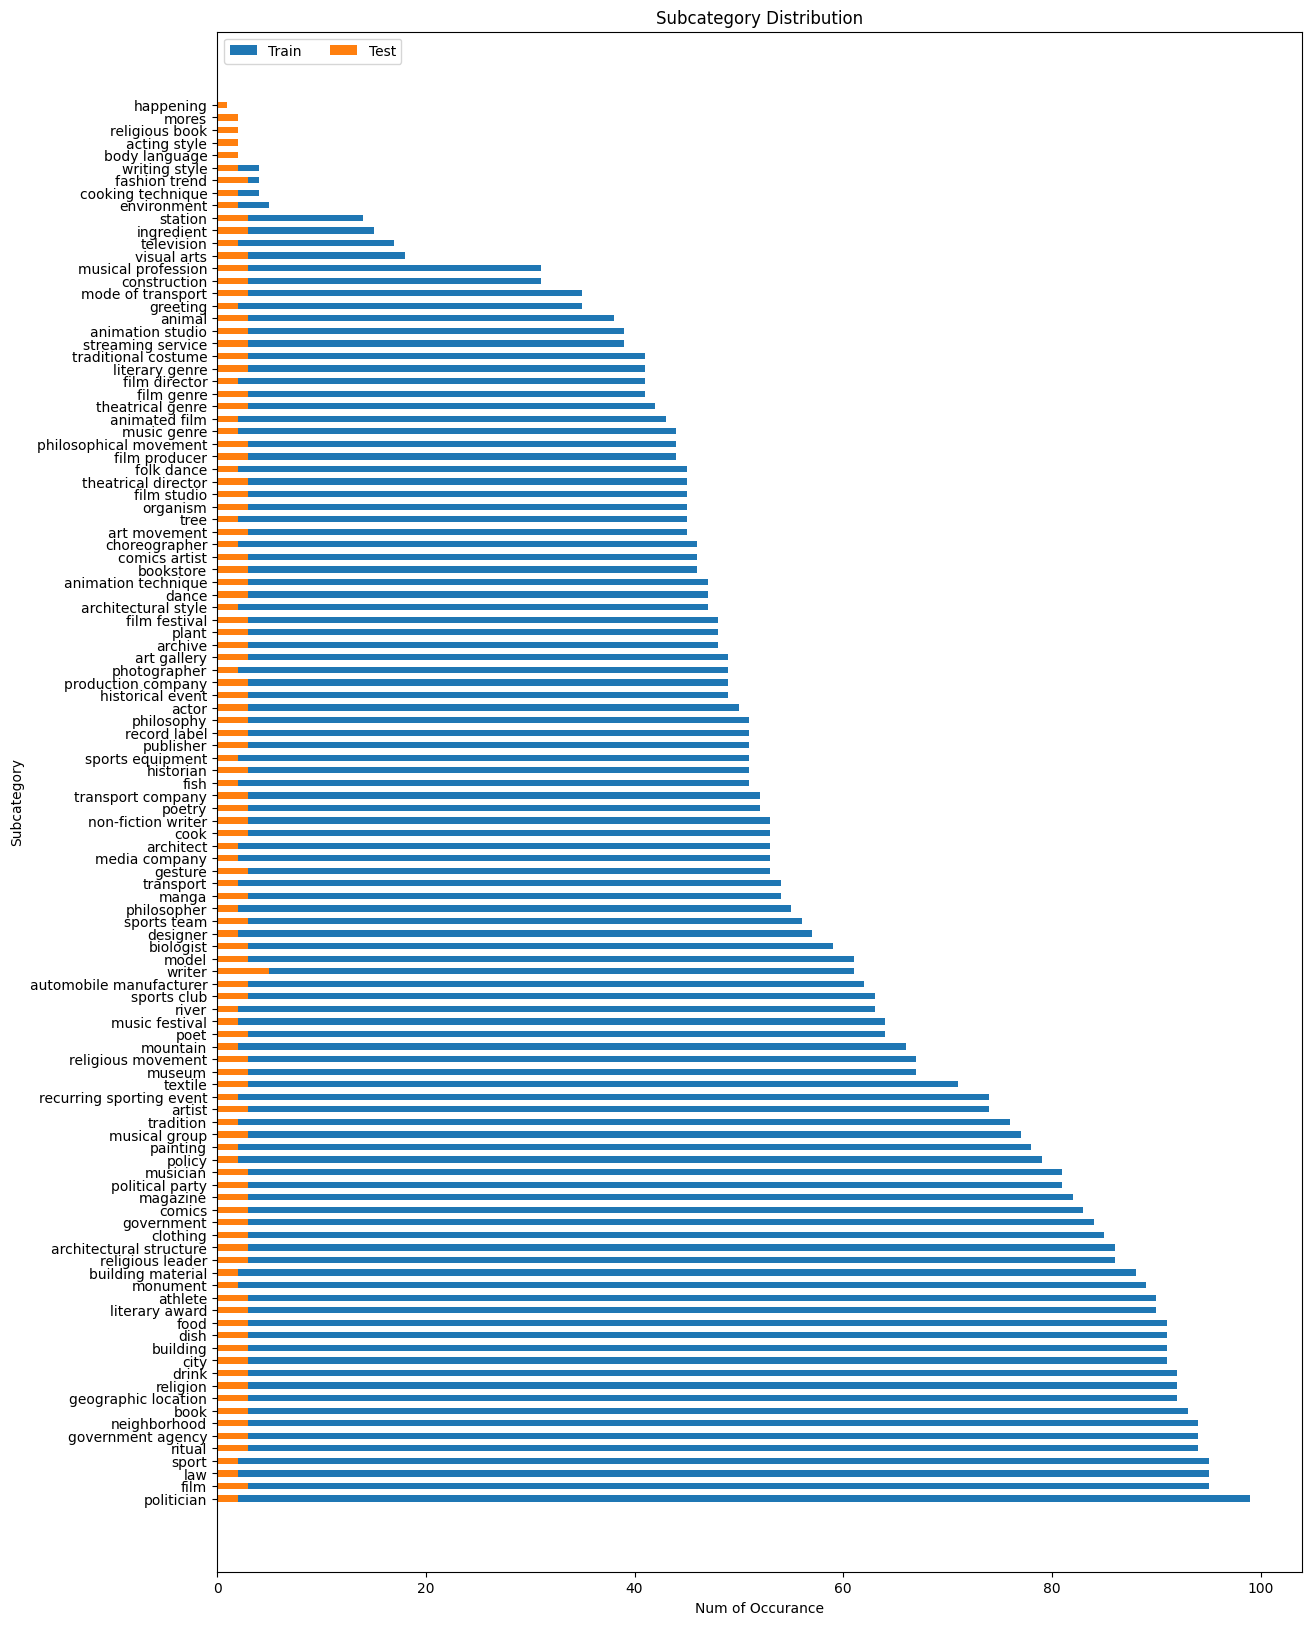

In [7]:
# Plots category distribution

plt.figure(figsize=(14,20))
plt.title('Subcategory Distribution')
plt.ylabel('Subcategory')
plt.xlabel('Num of Occurance')
plt.barh(sub_dist_t.index, sub_dist_t, 0.5, label='Train')
plt.barh(sub_dist_v.index, sub_dist_v, 0.5, label='Test')
plt.legend(loc='upper left', ncols=2)

## Labels Analysis

Check the number of classes to identify, this analysis is useful to find unbalanced data factor

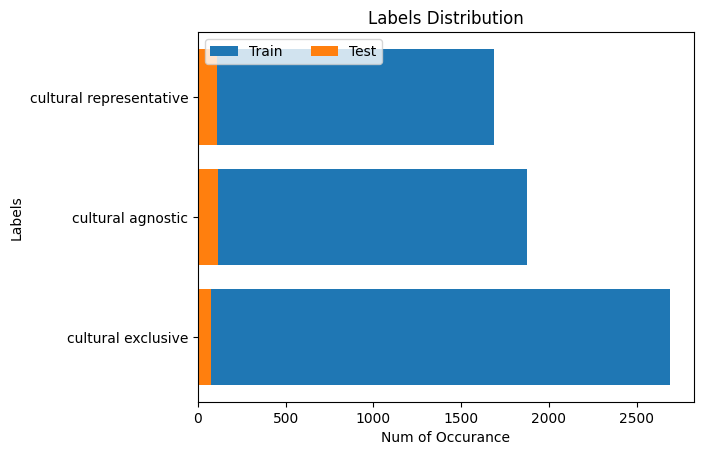

In [8]:
# Plots category distribution

plt.figure()
plt.title('Labels Distribution')
plt.ylabel('Labels')
plt.xlabel('Num of Occurance')
plt.barh(label_dist_t.index, label_dist_t, label='Train')
plt.barh(label_dist_v.index, label_dist_v, label='Test')
plt.legend(loc='upper left', ncols=2)

## Type Analysis

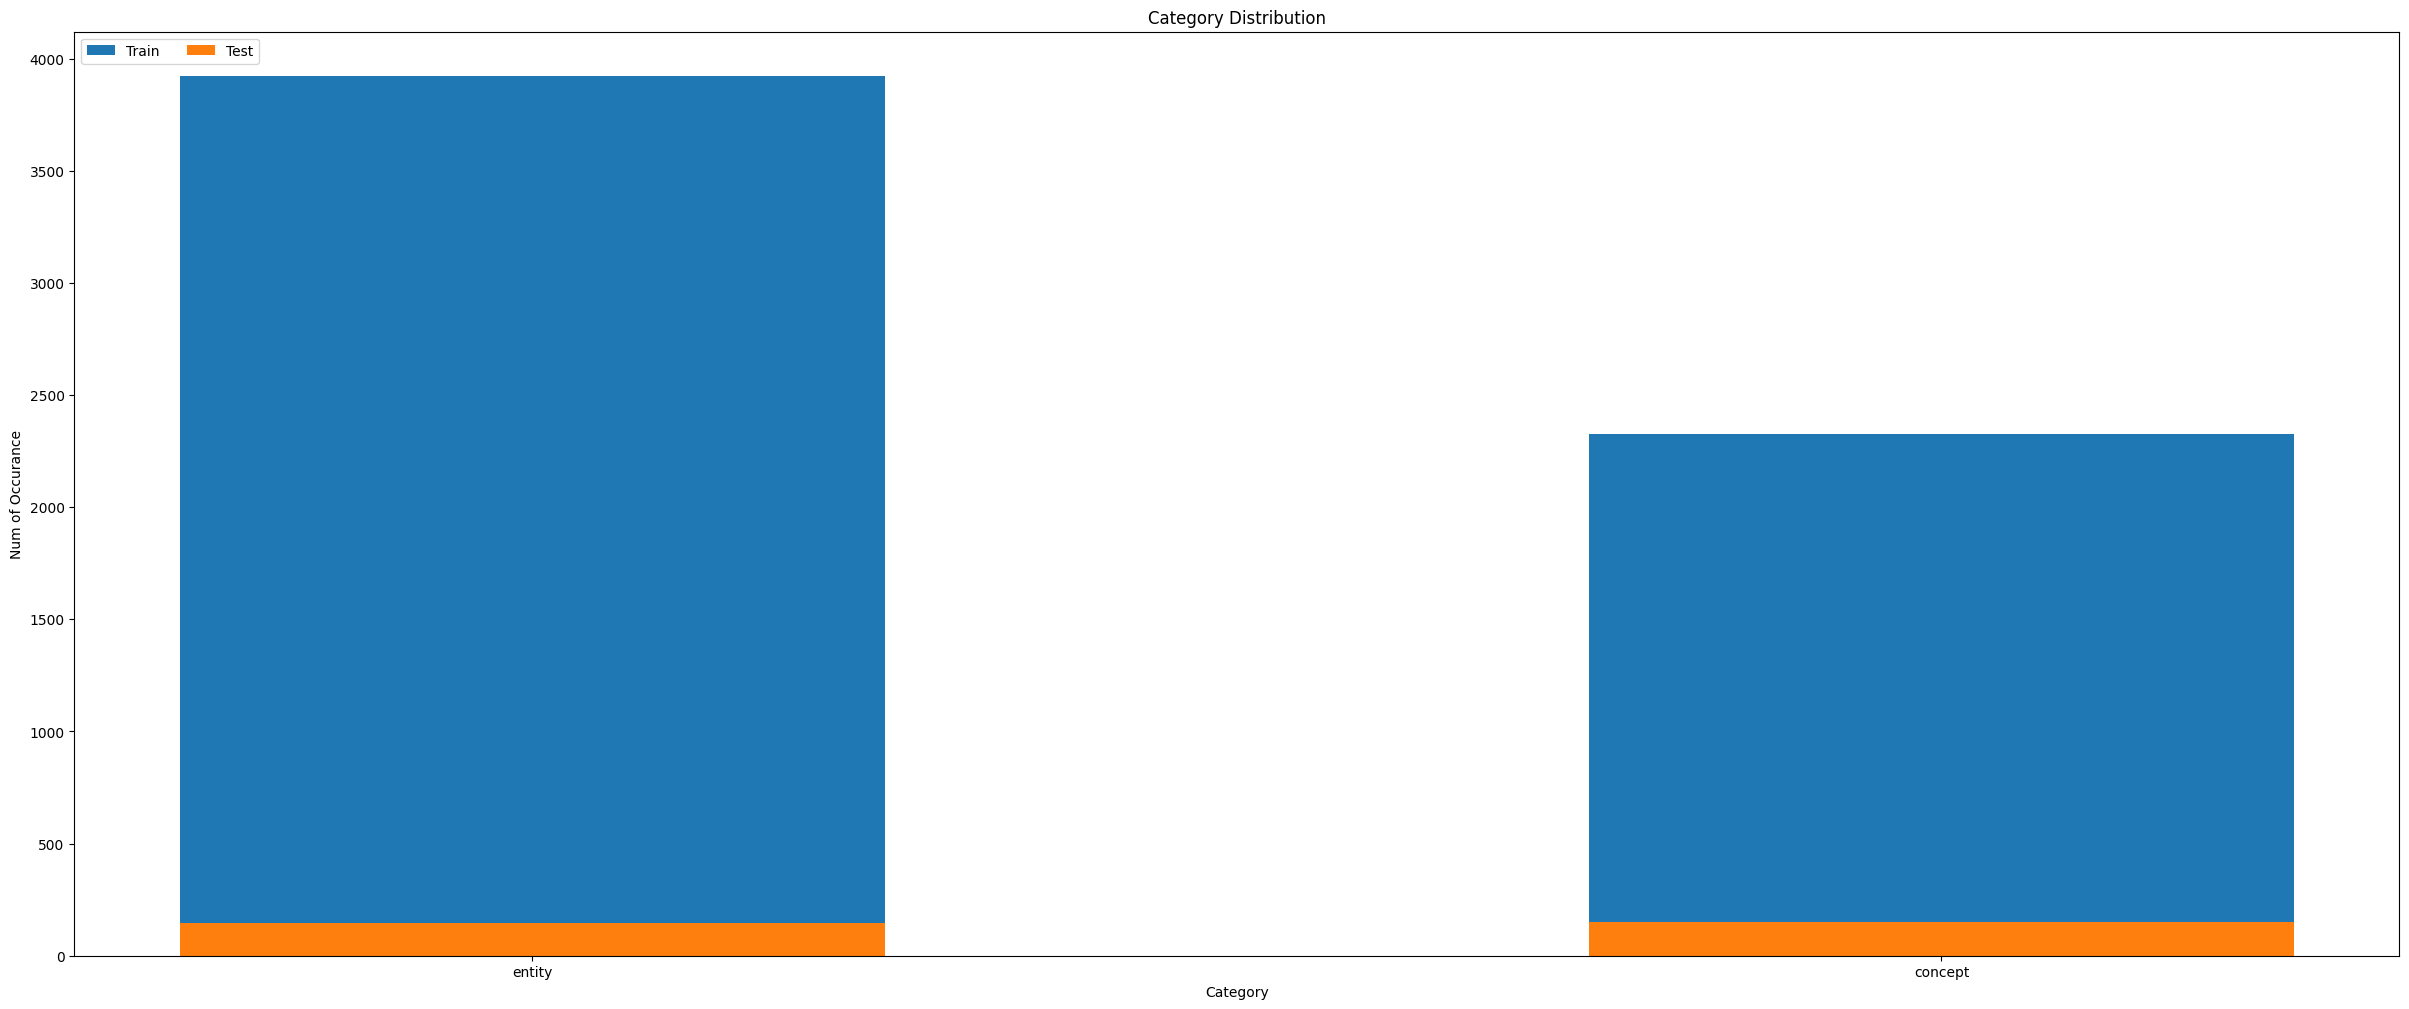

In [9]:
# Plots category distribution
plt.figure(figsize=(30,12))
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Num of Occurance')
plt.bar(type_dist_t.index, type_dist_t, 0.5, label='Train')
plt.bar(type_dist_v.index, type_dist_v, 0.5, label='Test')
plt.legend(loc='upper left', ncols=2)

## Languages Analysis

In [10]:
#TODO

## Links Analysis

In [11]:
#TODO

## Hyperlinks Modelling

### Parse of Links

In [12]:
import re

def extract_relevant_links(response, maxlinks):
    # Get the 'pages' section from the response JSON
    data = response.json()
    pages = data.get("query", {}).get("pages", {})

    valid_links = []

    # Iterate through pages and their links
    for page_id in pages:
        page = pages[page_id]
        links = page.get("links", [])
        print(f"Number of Total Links Found: {len(links)}")
        
        for link in links:
            title = link["title"]

            # Filter out non-article links:
            # Skip links that belong to special namespaces or are fragment links
            if ":" in title or "#" in title:  # Namespace or anchor links (e.g., 'Category:', 'File:', etc.)
                continue
            if not re.match(r'^[A-Za-z0-9 \-()%]+$', title):  # Valid characters in titles
                continue
            if len(title) < 2 or title.lower() in ['edit', 'citation']:  # Skip trivial links like 'edit' or 'citation'
                continue

            # Exclude links that belong to non-article namespaces or are external links
            if title.startswith(("File:", "Category:", "Help:", "Portal:", "Special:", "Talk:")):
                continue
            if re.match(r'^(http|https):\/\/', title):  # Skip external links (starting with 'http' or 'https')
                continue

            # Additional check to exclude links that might point to HTML elements or page structure
            # This includes any links that are purely numbers, or other unwanted non-article titles
            if title.isdigit():  # Filter out links that are only numbers (often page references or element IDs)
                continue

            # Only add unique, relevant links to the valid_links list
            if title not in valid_links:
                valid_links.append(title)

            # Break early if we've reached the maximum number of links
            if len(valid_links) >= maxlinks:
                break
        
        # If we've found enough links, break out of the loop
        if len(valid_links) >= maxlinks:
            break
    
    print(f"Number of Parsed Links Found: {len(valid_links)}")
    return valid_links


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

def BFS_Links(G: nx.DiGraph, title: str, limit: int , depth: int) -> nx.DiGraph:
    
    url = f"https://en.wikipedia.org/w/api.php?action=query&titles={title}&prop=links&pllimit=max&format=json"
    try:
        response = requests.get(url,
        params={
            "action": "query",
            "prop": "links",
            'titles': title,
            "pllimit": "max",
            "plnamespace": "0",  # Solo namespace 0 per evitare link non pertinenti
            "format": "json"
        })
        response.raise_for_status()
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error: {http_err}")
        return G
    except requests.exceptions.Timeout:
        print("Request timed out.")
        return G
    except requests.exceptions.RequestException as err:
        print(f"Request error: {err}")
        return G
    except ValueError as json_err:
        print(f"JSON parsing error: {json_err}")
        return G

    # Add the base node if it's not already in the graph
    base = title
    if not G.has_node(base):
        G.add_node(base, count=1)
        G.nodes[base]['visited'] = False  # mark as not visited
    

    # Extract links from the API response
    links = extract_relevant_links(response, maxlinks=limit)
    #print(links)
    G.nodes[base]['visited'] = True  # mark base as visited
    if len(links) == 0:
        return G
    
    # Explore the links
    for link in links:
        if not G.has_node(link):
            G.add_node(link, count=1)  # new node → count as first visit
            G.nodes[link]['visited'] = False  # mark as not visited
            G.add_edge(base, link)  # add edge between base and link
        else:
            G.nodes[link]['count'] += 1
            #print(f"Node '{link}' has been seen {G.nodes[link]['count']} times.")
            
        
    

    # Recursive call to explore all links

    if not depth - 1:
        return G
    
    for link in links:
        print(f'====================[level {depth}]|[{base}]====================')
        if not G.nodes[link]['visited']:
            print(f'visit{G.nodes[link]['count']}')
            G = BFS_Links(G, link, limit, depth - 1) # recursive call
       
    return G



{'dewiki': {'site': 'dewiki', 'title': 'Teilnehmer (Strafrecht)', 'badges': [], 'url': 'https://de.wikipedia.org/wiki/Teilnehmer_(Strafrecht)'}, 'enwiki': {'site': 'enwiki', 'title': 'Accomplice', 'badges': ['Q70893996'], 'url': 'https://en.wikipedia.org/wiki/Accomplice'}, 'eowikiquote': {'site': 'eowikiquote', 'title': 'Kunkulpulo', 'badges': [], 'url': 'https://eo.wikiquote.org/wiki/Kunkulpulo'}, 'eswiki': {'site': 'eswiki', 'title': 'Cómplice', 'badges': [], 'url': 'https://es.wikipedia.org/wiki/C%C3%B3mplice'}, 'eswikiquote': {'site': 'eswikiquote', 'title': 'Complicidad', 'badges': [], 'url': 'https://es.wikiquote.org/wiki/Complicidad'}, 'etwikiquote': {'site': 'etwikiquote', 'title': 'Kaasosaline', 'badges': [], 'url': 'https://et.wikiquote.org/wiki/Kaasosaline'}, 'euwiki': {'site': 'euwiki', 'title': 'Konplize', 'badges': [], 'url': 'https://eu.wikipedia.org/wiki/Konplize'}, 'frwiki': {'site': 'frwiki', 'title': 'Complice', 'badges': [], 'url': 'https://fr.wikipedia.org/wiki/Com

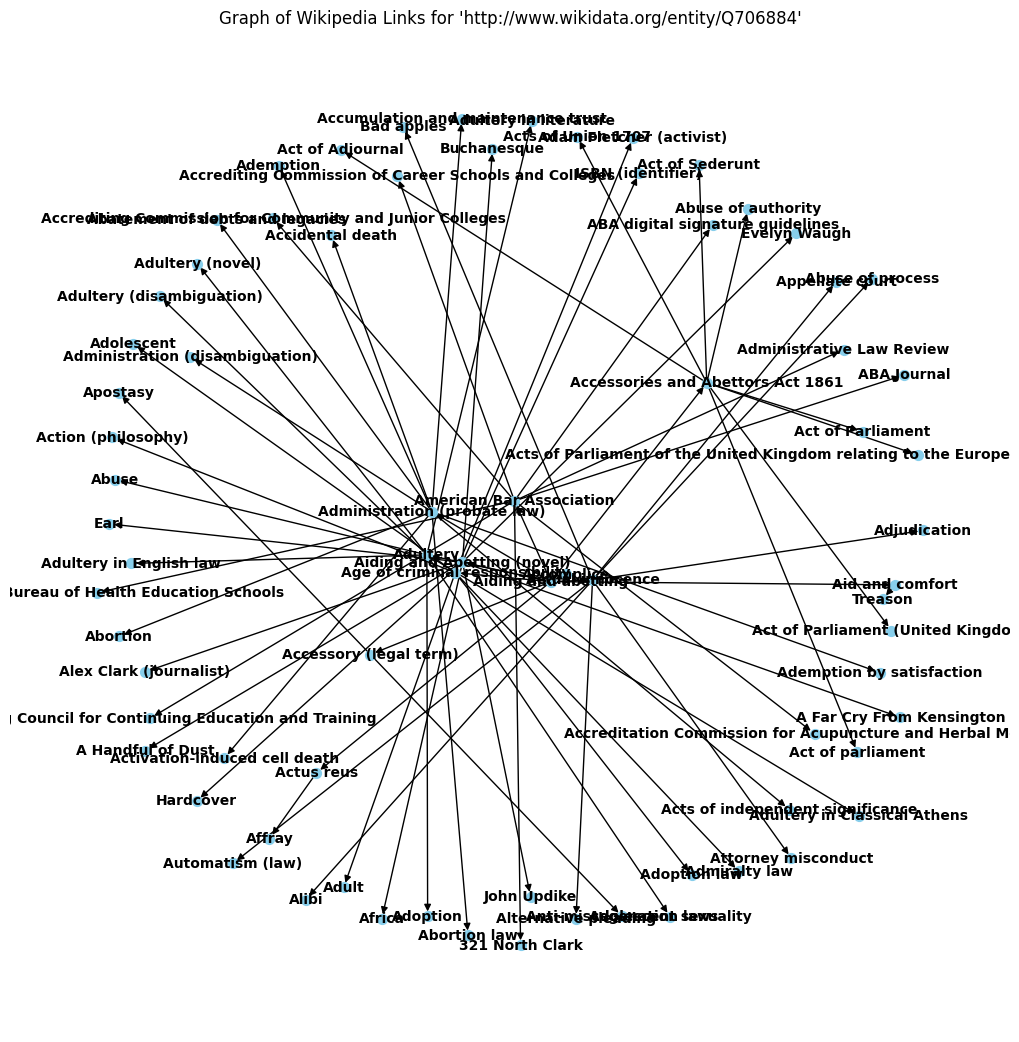

PageRank of nodes: {'Accomplice': 0.011460302813247386, 'Aiding and abetting': 0.021201241519404883, 'Accessories and Abettors Act 1861': 0.013262514182329363, 'Accessory (legal term)': 0.013262514182329363, 'Actual innocence': 0.013262514182329363, 'Actus reus': 0.013262514182329363, 'Administration (probate law)': 0.013262514182329363, 'Adultery': 0.013262514182329363, 'Age of criminal responsibility': 0.013262514182329363, 'Aid and comfort': 0.013262514182329363, 'Aiding and Abetting (novel)': 0.013262514182329363, 'American Bar Association': 0.013262514182329363, 'Abuse of authority': 0.012869230770865742, 'Act of Adjournal': 0.012869230770865742, 'Act of Parliament': 0.012869230770865742, 'Act of Parliament (United Kingdom)': 0.012869230770865742, 'Act of Sederunt': 0.012869230770865742, 'Act of parliament': 0.012869230770865742, 'Acts of Parliament of the United Kingdom relating to the European Communities and the European Union': 0.012869230770865742, 'Acts of Union 1707': 0.012

In [26]:
# Initialize an empty graph
G = nx.DiGraph()

# Example starting point
start_page = dataset_t['item'][56]
qid = extract_entity_id(start_page)
w = Wiki_Scrapter(qid)
title = w.get_title()

# Add the starting page to the graph
# Recall the BFS_Links function
G = BFS_Links(G, title, limit=10, depth=3)

# Now we have a graph with nodes and edges representing Wikipedia pages and links between them

# Example analysis: Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G,pos=pos, with_labels=True, node_size=50, node_color="skyblue", font_size=10, font_weight="bold")
plt.title(f"Graph of Wikipedia Links for '{start_page}'")
plt.show()

# PageRank analysis (calculating importance of nodes)
pagerank = nx.pagerank(G)
print("PageRank of nodes:", pagerank)